# Exercise 2

## Setup

Importing the packages.

In [1]:
from sklearn.datasets import load_digits
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams["figure.figsize"] = (6,6)
from sklearn import model_selection
from sklearn.model_selection import KFold
from scipy.stats import multivariate_normal

Loading the data.

In [2]:
digits = load_digits() 
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
data = digits["data"]
images = digits["images"]
target = digits["target"]
target_names = digits["target_names"]

Get the indices of 7 and 1.

In [4]:
indices = np.logical_or(target == 1, target == 7)
sum(indices) # quick check

361

Split the data $\frac{N_{train}}{N_{test}} = \frac{3}{2}$.

In [5]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(digits.data[indices, :], digits.target[indices],
    test_size = 0.4, random_state = 0)

In [6]:
X_train1, X_train7 = X_train[np.where(y_train == 1)], X_train[np.where(y_train == 7)]

## 1.1 Dimension Reduction & 1.2 Scatterplot

Visualizing the average 1 and 7.

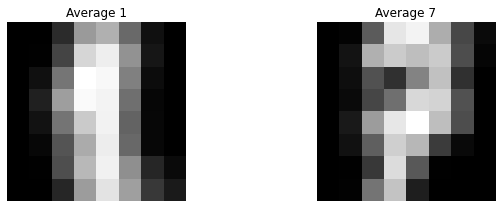

In [7]:
# average image of one
one = X_train[np.where(y_train == 1)]
average_one = np.mean(one, axis = 0)
# average image of seven
seven = X_train[np.where(y_train == 7)]
average_seven = np.mean(seven, axis = 0)
# visualize the average image
fig, axes = plt.subplots(1,2, figsize=(10,3), tight_layout=True)

axes[0].imshow(average_one.reshape((8,8)), cmap="gray", interpolation="nearest")
axes[0].set_axis_off()
axes[0].set_title("Average 1")

axes[1].imshow(average_seven.reshape((8,8)), cmap="gray", interpolation="nearest")
axes[1].set_axis_off()
axes[1].set_title("Average 7")

plt.show()

Defining three dimensional reduction techniques:
1. Using the pixels with the largest mean differences as features
2. Using CA to construct more informative features
3. Using the sum of the 3 pixels whose values are much higher in class 1 as feature 1 and the sum of the 3 pixels whose values are much higher in class 7 as feature 2
    

In [8]:
class DimRed:
    """
    Object to implement 3 different ways of reducing the dimensions of the 8x8 images.
    """
    def __init__(self, X_train, y_train):
        self.X = X_train
        self.y = y_train
    
    # using the pixels with the largest mean differences as features
    def fit_single(self):
        l1, l2 = tuple(np.unique(self.y))
        abs_diffs = np.abs(np.mean(self.X[np.where(self.y == l1)], axis=0) - \
                       np.mean(self.X[np.where(self.y == l2)], axis=0))
        self.single1, self.single2 = np.argsort(-abs_diffs)[0], np.argsort(-abs_diffs)[1]
    
    def reduce_single(self, X):
        return X[:, [self.single1, self.single2]]
    
    # using PCA to construct more informative features
    def fit_pca(self):
        centered = self.X - np.mean(self.X, axis=0)
        cov = 1/(centered.shape[0]-1) * centered.T@centered
        self.eigenvec = npl.eig(cov)[1]
        
    def reduce_pca(self, X):
        return (X@self.eigenvec)[:,0:2]
    
    # Using the sum of the 3 pixels whose values are much higher in class 1 as feature 1 
    # and the sum of the 3 pixels whose values are much higher in class 7 as feature 2
    def fit_three(self):
        l1, l2 = tuple(np.unique(self.y))
        abs_diffs = np.mean(self.X[np.where(self.y == l1)], axis=0) - \
                    np.mean(self.X[np.where(self.y == l2)], axis=0)
        self.ind1, self.ind2 = np.argsort(-abs_diffs)[0:3], np.argsort(abs_diffs)[0:3]
        
    def reduce_three(self, X):
        feat1, feat2 = np.sum(X[:,self.ind1], axis=1), np.sum(X[:,self.ind2], axis=1)
        return np.array([feat1, feat2]).T

<font color='green'><b>
Unnecessary to use an OOP approach here, a function would have been enough and probablier easier to handle
</b></font>

Define function to plot the results:

In [11]:
def plot_reduction(X_train, y_train):
    l1, l2 = tuple(np.unique(y_train))
    plt.scatter(X_train[np.where(y_train == l1)][:,0], 
                X_train[np.where(y_train == l1)][:,1], 
                c="green", label=f"Class {l1}")
    plt.scatter(X_train[np.where(y_train == l2)][:,0], 
                X_train[np.where(y_train == l2)][:,1],
                c="orange", label=f"Class {l2}")
    plt.legend()
    plt.xlabel("Engineered Feature 1")
    plt.ylabel("Engineered Feature 2")
    plt.show()

### 1.1. a) Using the pixels with the largest mean differences as features

In [ ]:
dimred = DimRed(X_train, y_train)
dimred.fit_single()
X_train_red = dimred.reduce_single(X_train)
print(X_train_red[0:5,:])
X_test_red = dimred.reduce_single(X_test)
print(X_test_red[0:5,:])

[[ 5. 15.]
 [ 0.  5.]
 [16. 16.]
 [ 0.  0.]
 [ 4.  1.]]
[[ 5.  0.]
 [ 5.  0.]
 [15. 14.]
 [15.  8.]
 [ 0.  0.]]


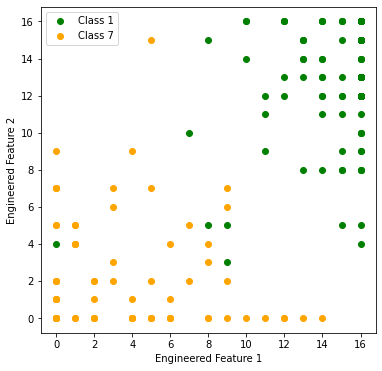

In [ ]:
plot_reduction(X_train_red, y_train)

### 1.1. b) Using PCA to construct more informative features

In [ ]:
dimred = DimRed(X_train, y_train)
dimred.fit_pca()
X_train_red = dimred.reduce_pca(X_train)
print(X_train_red[0:5,:])
X_test_red = dimred.reduce_pca(X_test)
print(X_test_red[0:5,:])

[[ -7.2782927  -14.19919142]
 [-16.74023382  -8.17220901]
 [  8.11634884  22.30819024]
 [-26.04195855   0.36346019]
 [-11.57785014  13.27059602]]
[[-16.82424589  -4.40204152]
 [-12.83514553   8.46984538]
 [ 16.20978971 -13.53018598]
 [ 12.60565105 -31.85216637]
 [-19.55405966   5.9853355 ]]


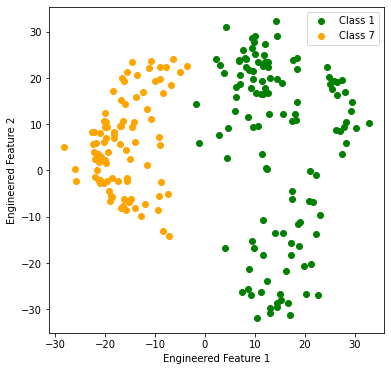

In [ ]:
plot_reduction(X_train_red, y_train)

### 1.1 c) Using the sum of the 3 pixels whose values are much higher in class 1 as feature 1 and the sum of the 3 pixels whose values are much higher in class 7 as feature 2

In [ ]:
dimred = DimRed(X_train, y_train)
dimred.fit_three()
X_train_red = dimred.reduce_three(X_train)
print(X_train_red[0:5,:])
X_test_red = dimred.reduce_three(X_test)
print(X_test_red[0:5,:])

[[21. 33.]
 [ 5. 35.]
 [40. 22.]
 [ 0. 37.]
 [ 5. 39.]]
[[ 5. 37.]
 [ 5. 26.]
 [44. 24.]
 [37. 32.]
 [ 0. 27.]]


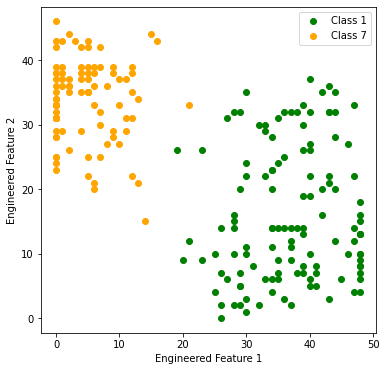

In [ ]:
plot_reduction(X_train_red, y_train)

<font color='green'><b>
Nice that different techniques for reducing feature dimensions were tried although not necessary
</b></font>

## 2 Nearest Mean Classifer Implementation & Visualization

Preparing the dimensional reduction.

In [12]:
dimred = DimRed(X_train, y_train)
dimred.fit_single()
dimred.fit_pca()
dimred.fit_three()

In [13]:
X_train_single, X_test_single = dimred.reduce_single(X_train), dimred.reduce_single(X_test)
X_train_pca, X_test_pca = dimred.reduce_pca(X_train), dimred.reduce_pca(X_test)
X_train_three, X_test_three = dimred.reduce_three(X_train), dimred.reduce_three(X_test)

Define the nearest mean classifier.

In [14]:
class NM_Classifier:
    """
    Nearest-mean classifer, training features and labels must be provided for initiatlization.
    """
    def __init__(self, X_train, y_train):
        self.X = X_train
        self.y = y_train
    
    def fit(self):
        self.l1, self.l2 = tuple(np.unique(self.y)) # labels
        # get the means corresponding to each class
        self.mean1 = np.mean(self.X[np.where(self.y == self.l1)], axis=0)
        self.mean2 = np.mean(self.X[np.where(self.y == self.l2)], axis=0)
    
    def predict(self, X_test):
        # predict the labels coressponding to the class whose mean is closer
        dist1 = np.sum((X_test - self.mean1)**2, axis=1)**0.5
        dist2 = np.sum((X_test - self.mean2)**2, axis=1)**0.5
        return np.where(dist1 < dist2, self.l1, self.l2)

Define function for visualization:

In [15]:
def vis_decision(X_train, X_test, y_train, y_test, classifier):
    # define the min/max for each feature axis
    f1min, f1max = X_test[:,0].min(), X_test[:,0].max()
    f2min, f2max = X_test[:,1].min(), X_test[:,1].max()
    # adding 20% of the whole spin to the min/max of each feature (so points are not at the edges)
    span1, span2 = f1max-f1min, f2max-f2min
    feat1 = np.linspace(f1min-span1*.2, f1max+span1*.2, 200)
    feat2 = np.linspace(f2min-span2*.2, f2max+span2*.2, 200)
    F1, F2 = np.meshgrid(feat1,feat2)
    # flatten and combine the features from the meshgrid to compute the predictions
    predictions = classifier.predict(np.vstack((F1.flatten(), F2.flatten())).T).reshape((200, 200))
    plt.contourf(F1, F2, predictions, alpha=0.2, colors=["green", "orange"]) # decision boundary
    plt.scatter(X_test[:,0][np.where(y_test == 1)], # test data
                X_test[:,1][np.where(y_test == 1)],
                c="green", label=f"Class 1")
    plt.scatter(X_test[:,0][np.where(y_test == 7)], 
                X_test[:,1][np.where(y_test == 7)],
                c="orange", label=f"Class 7")
    plt.scatter(classifier.mean1[0], classifier.mean1[1], marker="x", # means
                color="black", s=8**3, linewidths=3)
    plt.scatter(classifier.mean2[0], classifier.mean2[1], marker="x", 
                color="black", s=8**3, linewidths=3)
    plt.xlabel("Engineered Feature 1")
    plt.ylabel("Engineered Feature 2")
    plt.legend()
    plt.show()

Test the nearest mean classifier with different dimensional reduction techniques.

In [16]:
# a) Two Pixels
nm_classifier = NM_Classifier(X_train_single, y_train)
nm_classifier.fit()
predicted_labels = nm_classifier.predict(X_test_single)
print(f"Error rate [%]: {np.mean(y_test != predicted_labels) * 100}")
print(f"Number of Errors: {np.sum(y_test != predicted_labels)}")

Error rate [%]: 0.6896551724137931
Number of Errors: 1


We get a very low test error (in fact there is only one error, which we can nicely see below).

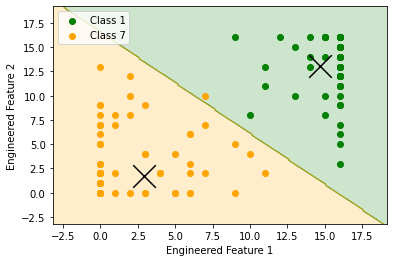

In [17]:
vis_decision(X_train_single, X_test_single, y_train, y_test, nm_classifier)

In [ ]:
# b) PCA
nm_classifier = NM_Classifier(X_train_pca, y_train)
nm_classifier.fit()
predicted_labels = nm_classifier.predict(X_test_pca)
print(f"Error rate [%]: {np.mean(y_test != predicted_labels) * 100}")
print(f"Number of Errors: {np.sum(y_test != predicted_labels)}")

Error rate [%]: 0.6896551724137931
Number of Errors: 1


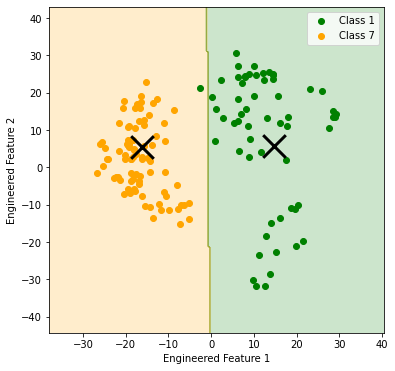

In [ ]:
vis_decision(X_train_pca, X_test_pca, y_train, y_test, nm_classifier)

In [ ]:
# c) Six Pixels
nm_classifier = NM_Classifier(X_train_three, y_train)
nm_classifier.fit()
predicted_labels = nm_classifier.predict(X_test_three)
print(f"Error rate [%]: {np.mean(y_test != predicted_labels) * 100}")
print(f"Number of Errors: {np.sum(y_test != predicted_labels)}")

Error rate [%]: 0.0
Number of Errors: 0


I guess this kind of dimensional reduction is actually too good for this task since there is not test error. (Although there are four datapoint (3 x greeen, 1 x red) which are close the decision boundary)

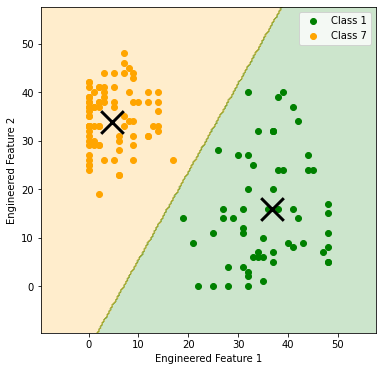

In [ ]:
vis_decision(X_train_three, X_test_three, y_train, y_test, nm_classifier)

<font color='green'><b>
Again nice implementations, but using a function instead of a class could have made things more readable, the class does not offer an advantage
</b></font>

## 3. QDA Classifer

Preparing the features.

In [ ]:
X_single = dimred.reduce_single(digits.data[indices, :])
X_pca = dimred.reduce_pca(digits.data[indices, :])
X_three = dimred.reduce_three(digits.data[indices, :])
y = np.where(digits.target[indices] == 1, 0, 1)

Change the labels of the training and test set, such that 1 -> 0 and 7 -> 1.

In [ ]:
t_y_train, t_y_test = np.where(y_train==1, 0, 1), np.where(y_test==1, 0, 1)
print(t_y_train[0:5])
print(t_y_test[0:5])

[1 1 0 1 1]
[1 1 0 0 1]


QDA Training Algorithm:

1. Create class-wise subsets of training set for each $k$
2. Learn the prior $p(y=k)$
3. For each class $k$ learn the likelihood $p(x|y=k)$ which is a Gaussian distribution $\mathcal{N}(\mu,\Sigma)$
4. Caclulate the evidence $p(x) = \sum_k p(y=k) p(x \mid y=k)$

In [ ]:
class QDA_classifer:
    
    def __init__(self, X_train, y_train):
        self.X = X_train
        self.y = y_train
    
    def fit(self):
        self.l0, self.l1 = tuple(np.unique(self.y)) # labels
        # get the features corresponding to each class
        X0, X1 = self.X[self.y == self.l0,:], self.X[self.y == self.l1,:]
        mu0, mu1 = np.mean(X0, axis=0), np.mean(X1, axis=0)
        self.mu = np.vstack((mu0, mu1)) # means
        cov0, cov1 = 1/X0.shape[0] * (X0 - mu0).T@(X0 - mu0), 1/X1.shape[0] * (X1 - mu1).T@(X1 - mu1)
        self.covmat = np.stack((cov0, cov1)) # covariance matrices
        self.p = np.array([np.mean(self.y==self.l0), np.mean(self.y==self.l1)])
        
    def predict(self, X_test):
        inv_covmat = npl.inv(self.covmat)
        # compute the scores as shown in the lecture
        b = np.log((npl.det(2*np.pi*self.covmat))**0.5)
        scores = [((X_test - self.mu[i,:])@inv_covmat[i]*\
                              (X_test - self.mu[i,:])).sum(-1) + b[i] for i in [0,1]]
        return np.where(scores[0] < scores[1], self.l0, self.l1)
    
    def visualize(self):
        f1min, f1max = self.X[:,0].min(), self.X[:,0].max()
        f2min, f2max = self.X[:,1].min(), self.X[:,1].max()
        span1, span2 = f1max-f1min, f2max-f2min
        feat1 = np.linspace(f1min-span1*.2, f1max+span1*.2, 200)
        feat2 = np.linspace(f2min-span2*.2, f2max+span2*.2, 200)
        F1, F2 = np.meshgrid(feat1,feat2)
        pos = np.dstack((F1, F2))
        features = np.vstack((F1.flatten(), F2.flatten())).T
        predictions = self.predict(features).reshape((200, 200))
        Z1 = multivariate_normal.pdf(pos, mean=self.mu[0,:], cov=self.covmat[0,:,:])
        Z2 = multivariate_normal.pdf(pos, mean=self.mu[1,:], cov=self.covmat[1,:,:])

        # visualizing the eigenvectors
        eigen0, eigen1 = npl.eig(self.covmat[0,:,:]), npl.eig(self.covmat[1,:,:])
        scaled_vec0, scaled_vec1 = eigen0[1] * eigen0[0]**.5, eigen1[1] * eigen1[0]**.5

        points0 = scaled_vec0.T + self.mu[0]
        points0A = np.vstack([self.mu[0], points0[0,:]])
        points0B = np.vstack([self.mu[0], points0[1,:]])

        points1 = scaled_vec1.T + self.mu[1]
        points1A = np.vstack([self.mu[1], points1[0,:]])
        points1B = np.vstack([self.mu[1], points1[1,:]])

        plt.contourf(F1, F2, predictions, alpha=0.2, 
                     cmap=matplotlib.colors.ListedColormap(["green", "orange"]))
        plt.scatter(self.X[:,0][np.where(self.y == 0)], 
                    self.X[:,1][np.where(self.y == 0)],
                    c="green", label=f"Class 1", s=20)
        plt.scatter(self.X[:,0][np.where(self.y == 1)], 
                    self.X[:,1][np.where(self.y == 1)],
                    c="orange", label=f"Class 7", s=20)
        plt.contour(F1, F2, Z1, alpha=0.4, levels=8)
        plt.contour(F1, F2, Z2, alpha=0.4, levels=8)

        # eigenvectors continued
        plt.plot(points0A[:,0], points0A[:,1], color="steelblue", linewidth=3, alpha=.6)
        plt.plot(points0B[:,0], points0B[:,1], color="steelblue", linewidth=3, alpha=.6)
        plt.plot(points1A[:,0], points1A[:,1], color="steelblue", linewidth=3, alpha=.6)
        plt.plot(points1B[:,0], points1B[:,1], color="steelblue", linewidth=3, alpha=.6)
        plt.xlabel("Engineered Feature 1")
        plt.ylabel("Engineered Feature 2")
        plt.legend()
        plt.show()

Function to compute the cross validation error.

In [ ]:
def kcv(k, X, y, c_class):
    kf = KFold(n_splits=k)
    errors = []
    for train, test in kf.split(X):
        qda_classifier = c_class(X[train,:], y[train])
        qda_classifier.fit()
        predictions = qda_classifier.predict(X[test,:])
        errors.append(np.mean(predictions != y[test]) * 100)
    return {"mean error [%]": round(np.mean(errors),2), "sd": round(np.var(errors)**0.5,2)}

### a) QDA with 2 features which are based on 1 pixel each

In [ ]:
qda_classifier = QDA_classifer(X_train_single, t_y_train)
qda_classifier.fit()
train_error = np.mean(t_y_train != qda_classifier.predict(X_train_single)) * 100
test_error = np.mean(t_y_test != qda_classifier.predict(X_test_single)) * 100
print(f"Training Error: {round(train_error, 2)}")
print(f"Test Error: {round(test_error, 2)}")

Training Error: 2.78
Test Error: 0.0


Cross Validation Error: 
 {'mean error [%]': 1.94, 'sd': 3.3}


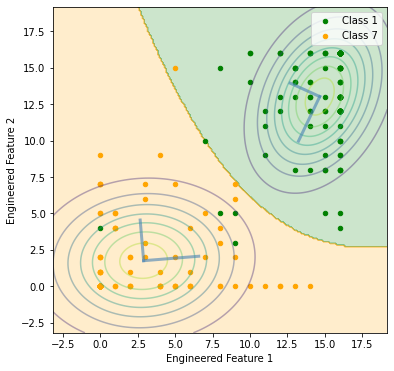

In [ ]:
cv = kcv(10, X_single, y, QDA_classifer)
print(f"Cross Validation Error: \n {cv}")
qda_classifier.visualize()

### b) QDA with 2 features which are the first principal components

In [ ]:
qda_classifier = QDA_classifer(X_train_pca, t_y_train)
qda_classifier.fit()
train_error = np.mean(t_y_train != qda_classifier.predict(X_train_pca)) * 100
test_error = np.mean(t_y_test != qda_classifier.predict(X_test_pca)) * 100
print(f"Training Error: {round(train_error, 2)}")
print(f"Test Error: {round(test_error, 2)}")

Training Error: 0.0
Test Error: 0.69


Cross Validation Error: 
 {'mean error [%]': 1.39, 'sd': 2.24}


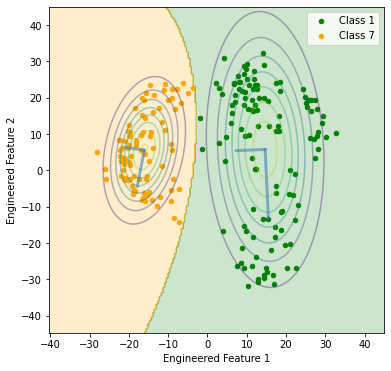

In [ ]:
cv = kcv(10, X_pca, y, QDA_classifer)
print(f"Cross Validation Error: \n {cv}")
qda_classifier.visualize()

### c) QDA with 2 features which are based on 3 pixels each

In [ ]:
qda_classifier = QDA_classifer(X_train_three, t_y_train)
qda_classifier.fit()
train_error = np.mean(t_y_train != qda_classifier.predict(X_train_three)) * 100
test_error = np.mean(t_y_test != qda_classifier.predict(X_test_three)) * 100
print(f"Training Error: {round(train_error, 2)}")
print(f"Test Error: {round(test_error, 2)}")

Training Error: 0.93
Test Error: 0.0


Cross Validation Error: 
 {'mean error [%]': 0.56, 'sd': 1.11}


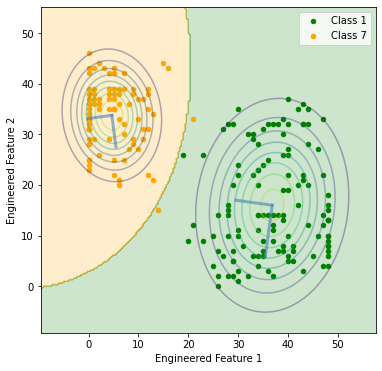

In [ ]:
cv = kcv(10, X_three, y, QDA_classifer)
print(f"Cross Validation Error: \n {cv}")
qda_classifier.visualize()

## 4. LDA

In [ ]:
class LDA_classifier:
    
    def __init__(self, X_train, y_train):
        self.X = X_train
        self.y = y_train
    
    def fit(self):
        self.l0, self.l1 = tuple(np.unique(self.y))
        X0, X1 = self.X[self.y == self.l0,:], self.X[self.y == self.l1,:]
        mu0, mu1 = np.mean(X0, axis=0), np.mean(X1, axis=0)
        self.mu = np.vstack((mu0, mu1))
        self.covmat = 1/self.X.shape[0] * ((X0 - mu0).T@(X0 - mu0) + (X1 - mu1).T@(X1 - mu1))
        self.p = np.array([np.mean(self.y==self.l0), np.mean(self.y==self.l1)])
        
    def predict(self, X_test):
        inv_covmat = npl.inv(self.covmat)
        b = np.log((npl.det(2*np.pi*self.covmat))**0.5) - np.log(self.p)
        # some error here?
        b_tilde = [- 1/2 * self.mu[i] @ npl.inv(self.covmat) @ self.mu[i].T - b[i] for i in [0,1]]
        w = [self.mu[i] @ npl.inv(self.covmat) for i in [0,1]]
        scores = [w[i]@X_test.T + b_tilde[i] for i in [0,1]]
        return np.where(scores[0] > scores[1], self.l0, self.l1)
    
    def visualize(self):
        f1min, f1max = self.X[:,0].min(), self.X[:,0].max()
        f2min, f2max = self.X[:,1].min(), self.X[:,1].max()
        span1, span2 = f1max-f1min, f2max-f2min
        feat1 = np.linspace(f1min-span1*.2, f1max+span1*.2, 200)
        feat2 = np.linspace(f2min-span2*.2, f2max+span2*.2, 200)
        F1, F2 = np.meshgrid(feat1,feat2)
        pos = np.dstack((F1, F2))
        features = np.vstack((F1.flatten(), F2.flatten())).T
        predictions = self.predict(features).reshape((200, 200))
        Z1 = multivariate_normal.pdf(pos, mean=self.mu[0,:], cov=self.covmat)
        Z2 = multivariate_normal.pdf(pos, mean=self.mu[1,:], cov=self.covmat)

        # Visualizing the Eigenvectors
        eigen0 = npl.eig(self.covmat)
        scaled_vec0 = eigen0[1] * eigen0[0]**.5

        points0 = scaled_vec0.T + self.mu[0]
        points0A, points0B = np.vstack([self.mu[0], points0[0,:]]), np.vstack([self.mu[0], points0[1,:]])

        points1 = scaled_vec0.T + self.mu[1]
        points1A, points1B = np.vstack([self.mu[1], points1[0,:]]), np.vstack([self.mu[1], points1[1,:]])
        
        plt.contourf(F1, F2, predictions, alpha=0.2, 
                     cmap=matplotlib.colors.ListedColormap(["green", "orange"]))
        plt.scatter(self.X[:,0][np.where(self.y == 0)], 
                self.X[:,1][np.where(self.y == 0)],
                c="green", label=f"Class 1", s=20)
        plt.scatter(self.X[:,0][np.where(self.y == 1)], 
                self.X[:,1][np.where(self.y == 1)],
                c="orange", label=f"Class 7", s=20)
        plt.contour(F1, F2, Z1, alpha=0.4, levels=8)
        plt.contour(F1, F2, Z2, alpha=0.4, levels=8)

        # Eigenvector continued
        plt.plot(points0A[:,0], points0A[:,1], color="steelblue", linewidth=3, alpha=.6)
        plt.plot(points0B[:,0], points0B[:,1], color="steelblue", linewidth=3, alpha=.6)
        plt.plot(points1A[:,0], points1A[:,1], color="steelblue", linewidth=3, alpha=.6)
        plt.plot(points1B[:,0], points1B[:,1], color="steelblue", linewidth=3, alpha=.6)
        plt.xlabel("Engineered Feature 1")
        plt.ylabel("Engineered Feature 2")
        plt.legend()
        plt.show()

### a) LDA with 2 features which are based on 1 pixel each

In [ ]:
lda_classifer = LDA_classifier(X_train_single, t_y_train)
lda_classifer.fit()
train_error = np.mean(t_y_train != lda_classifer.predict(X_train_single)) * 100
test_error = np.mean(t_y_test != lda_classifer.predict(X_test_single)) * 100
print(f"Training Error: {round(train_error, 2)}")
print(f"Test Error: {round(test_error, 2)}")

Training Error: 2.78
Test Error: 0.69


Cross Validation Error: 
 {'mean error [%]': 2.49, 'sd': 2.9}


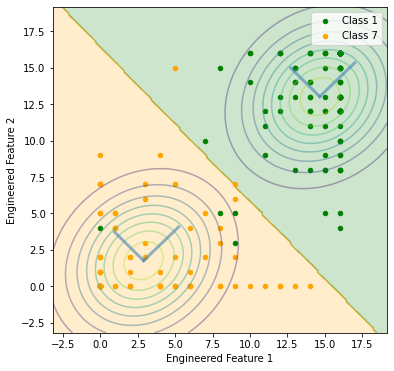

In [ ]:
cv = kcv(10, X_single, y, LDA_classifier)
print(f"Cross Validation Error: \n {cv}")
lda_classifer.visualize()

### b) LDA with 2 features which are the first principal components

In [ ]:
lda_classifer = LDA_classifier(X_train_pca, t_y_train)
lda_classifer.fit()
train_error = np.mean(t_y_train != lda_classifer.predict(X_train_pca)) * 100
test_error = np.mean(t_y_test != lda_classifer.predict(X_test_pca)) * 100
print(f"Training Error: {round(train_error, 2)}")
print(f"Test Error: {round(test_error, 2)}")

Training Error: 0.93
Test Error: 0.69


Cross Validation Error: 
 {'mean error [%]': 0.83, 'sd': 2.5}


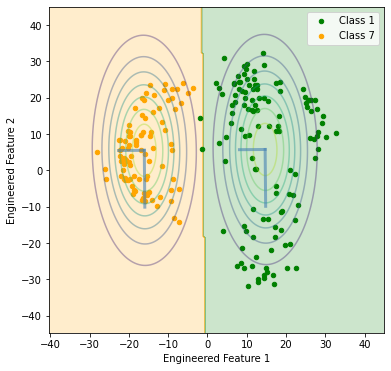

In [ ]:
cv = kcv(10, X_pca, y, LDA_classifier)
print(f"Cross Validation Error: \n {cv}")
lda_classifer.visualize()

### c) LDA with 2 features which are based on 3 pixels each

In [ ]:
lda_classifer = LDA_classifier(X_train_three, t_y_train)
lda_classifer.fit()
train_error = np.mean(t_y_train != lda_classifer.predict(X_train_three)) * 100
test_error = np.mean(t_y_test != lda_classifer.predict(X_test_three)) * 100
print(f"Training Error: {round(train_error, 2)}")
print(f"Test Error: {round(test_error, 2)}")

Training Error: 0.46
Test Error: 0.0


Cross Validation Error: 
 {'mean error [%]': 2.49, 'sd': 2.9}


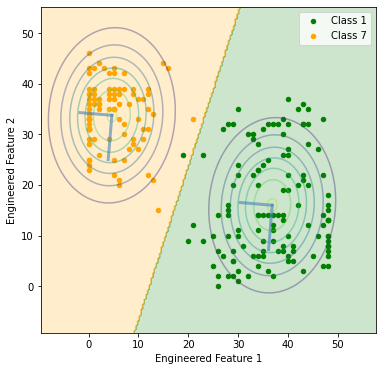

In [ ]:
cv = kcv(10, X_single, y, LDA_classifier)
print(f"Cross Validation Error: \n {cv}")
lda_classifer.visualize()